## Importing Libraries

In [1]:
import numpy as np
from matplotlib import image
from matplotlib.colors import rgb_to_hsv, hsv_to_rgb
import matplotlib.pyplot as plt
from scipy import signal

## Loading images

In [2]:
img_pink = image.imread('Pink.jpg').astype('uint16')
img_dark = image.imread('Dark.jpg').astype('uint16')

In [3]:
print(img_pink.shape, img_dark.shape, sep=' - ')

(2016, 1512, 3) - (1656, 2208, 3)


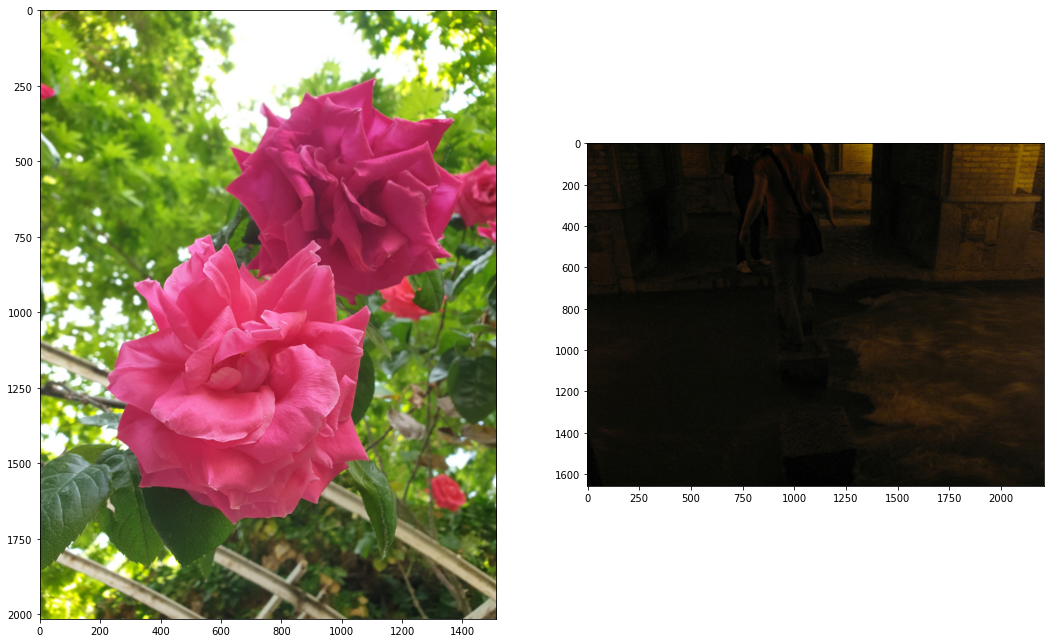

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(18, 13))
for i, img in enumerate([img_pink, img_dark]):
    ax[i].imshow(img)

## Channels histograms

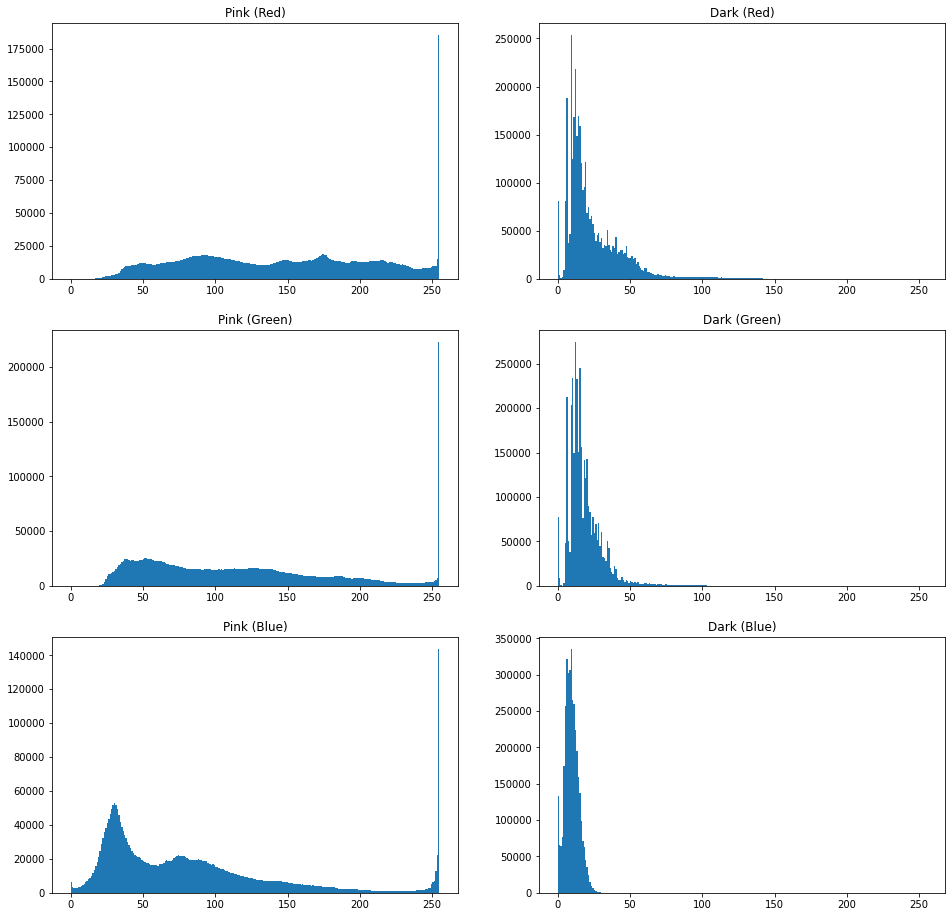

In [80]:
fig, ax = plt.subplots(3, 2, figsize=(16, 16))
for i, (img_name, img) in enumerate(zip(["Pink", "Dark"], [img_pink, img_dark])):
    for j, channel_name in enumerate(["Red", "Green", "Blue"]):
        ax[j][i].hist(img[:, :, j].flatten(), bins=range(256))
        ax[j][i].set_title(img_name + f" ({channel_name})")

## Histogram matching

To accomplish histogram matching:
1. Calculate CDF of each color ($0-255$) for both source and destination image
2. Now we want to map $color_i$ from source to $color_j$. For this purpose, we find the closes $j$ in destination's CDF to color $i$ in source's CDF. In essence, we're finding $F^{-1}_{dest}(F_{source}(x))$ for each pixel $x$.

In [81]:
def hist_match(source, dest):
    source_cdf = np.cumsum(np.bincount(source.flatten(), minlength=256))
    source_cdf = source_cdf / source_cdf[-1]
    dest_cdf = np.cumsum(np.bincount(dest.flatten(), minlength=256))
    dest_cdf = dest_cdf / dest_cdf[-1]
    
    new_colors = []
    closest_j = 0
    for i in range(256):
        while closest_j < 255 and source_cdf[i] > dest_cdf[closest_j]:
            closest_j += 1
        new_colors.append(closest_j)
    
    result = source.copy()
    for i in range(256):
        result[source == i] = new_colors[i]
    
    return result 

In [82]:
img_dark2 = np.stack([hist_match(img_dark[:, :, i], img_pink[:, :, i]) for i in range(3)], axis=2)

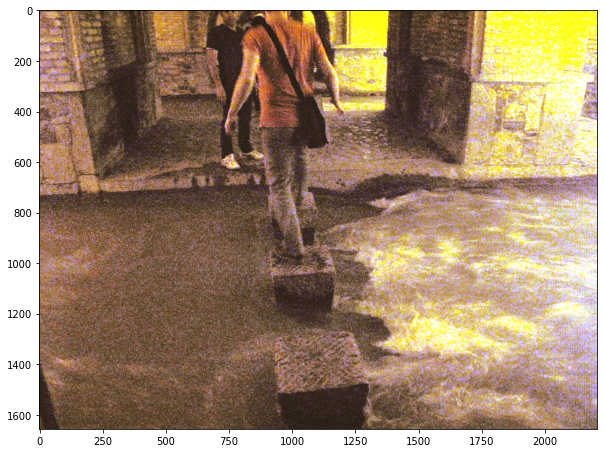

In [83]:
plt.figure(figsize=(10, 10))
plt.imshow(img_dark2);

## Channels histograms after matching

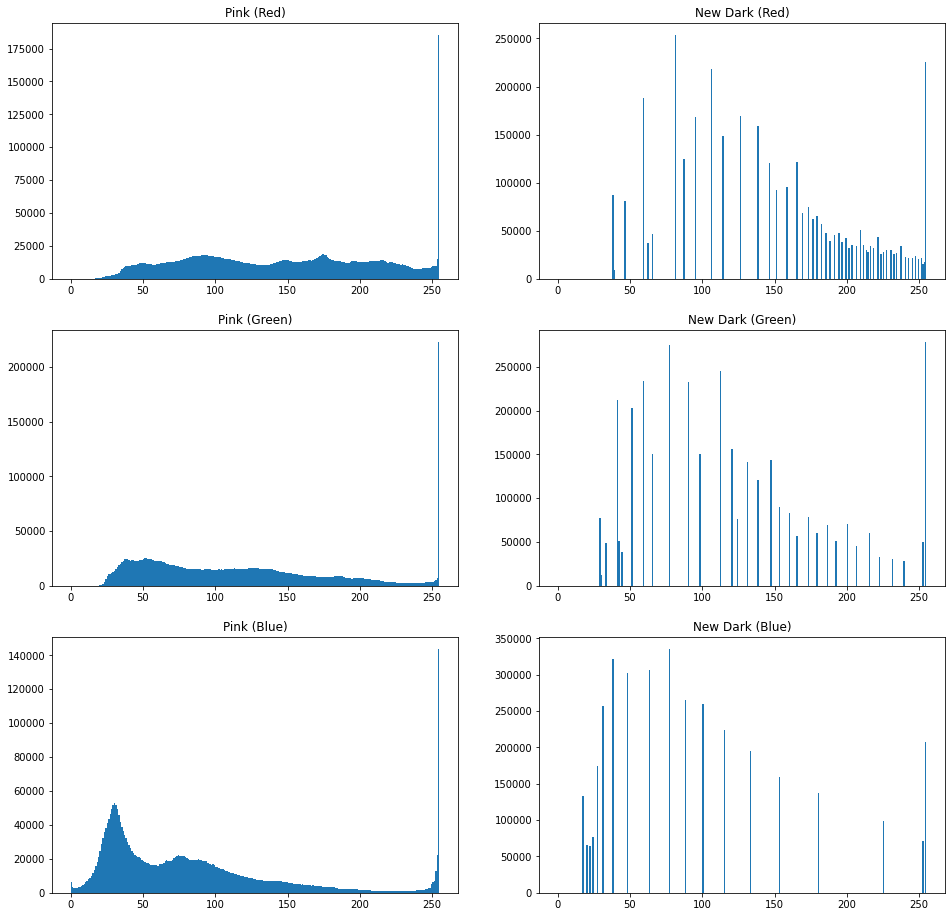

In [84]:
fig, ax = plt.subplots(3, 2, figsize=(16, 16))
for i, (img_name, img) in enumerate(zip(["Pink", "New Dark"], [img_pink, img_dark2])):
    for j, channel_name in enumerate(["Red", "Green", "Blue"]):
        ax[j][i].hist(img[:, :, j].flatten(), bins=range(256))
        ax[j][i].set_title(img_name + f" ({channel_name})")